In [172]:
from scipy.odr import RealData, ODR, quadratic
import numpy as np

In [203]:
data = RealData(x=[30, 40, 50], y=[34.1, 36.3, 30.0], sy=[0.01, 0.5, 1e-10, 1e-10])

In [204]:
odr = ODR(data, quadratic)

In [205]:
# odr.run()

In [206]:
# odr.output.pprint()

In [207]:
# B = odr.output.beta; print(f'B = {B}')
# S = odr.output.sd_beta; print(f'S = {S}')

In [208]:
X = np.matrix([[x**2, x, 1] for x in data.x])
Sy = np.diag([s**2 for s in data.sy])
y = np.array(data.y)

In [209]:
B = X.T.dot(X).I.dot(X.T).dot(y).A[0]; print(f'B = {B}')
S = np.sqrt(np.diag(X.T.dot(X).I.dot(X.T).dot(Sy).dot(X).dot(X.T.dot(X).I))); print(f'S = {S}')

B = [ -0.03809091   2.82463636 -16.26909091]
S = [  3.63664772e-03   2.85484250e-01   5.26444987e+00]


In [210]:
maxloc = -B[1]/(2*B[0]); print(f'maxloc = {maxloc}')

maxloc = 37.077565632452405


In [211]:
maxunc = np.sqrt(B[1]**2/(4*B[0]**4)*S[0]**2+(1/(4*B[0]**2))**2*S[1]**2); print(f'maxunc = {maxunc}')

maxunc = 49.31750887326591


In [212]:
lounc = (-B[1] - S[1] + np.sqrt(2*B[1]*S[1] + S[1]**2 - S[0]*B[1]**2/B[0])) / (2*B[0] + 2*S[0]); print(f'lounc = {lounc}')
hiunc = (-B[1] - S[1] - np.sqrt(2*B[1]*S[1] + S[1]**2 - S[0]*B[1]**2/B[0])) / (2*B[0] + 2*S[0]); print(f'hiunc = {hiunc}')

lounc = 22.391312946062605
hiunc = 67.87678421937872


In [213]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

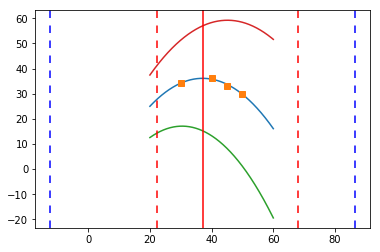

In [214]:
x = np.arange(20, 60, 0.01)
plt.plot(x, quadratic.fcn(B, x))
plt.errorbar(data.x, data.y, yerr=data.sy, fmt='s')
plt.plot(x, quadratic.fcn(B - S, x))
plt.plot(x, quadratic.fcn(B + S, x))
plt.axvline(maxloc, color='r')
plt.axvline(maxloc - maxunc, color='b', dashes=[5,5])
plt.axvline(lounc, color='r', dashes=[5,5])
plt.axvline(maxloc + maxunc, color='b', dashes=[5,5])
plt.axvline(hiunc, color='r', dashes=[5,5])